# A notebook for clustring and visualization

The term collocation has traditionally been restricted to words that are juxtaposed together as phrases like “strong coffee”, “strict regime” or “eat dinner”. Here we take collocations to be realized as skipgrams, or as word pairs that simply cooccur within a context which in itself is a contiguous sequence of words, typically a paragraph or a window of n words around a given word. Juxtaposed collocates will also be part of the result set. 

The collocates for a word are those words that are associated with it based on a measure of association. 


## Preparations 

*Run cell below if notebook is started from scratch, or if file `module_update.py` is not in same folder*

In [1]:
!curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

*Import commands from `module_update`and `nbtext`*

In [2]:
from module_update import update, css, code_toggle
update("nbtext")  
import nbtext as nb
from nbtext import cloud, get_urn, Cluster, Corpus
%matplotlib inline

Updated file `/home/lars/NB_API_Python/nbtext.py`

*Run command css() to change the default layout*

In [3]:
css()  # changes the visual layout of the notebook

*Add button to hide or show code lines*

In [7]:
# code_toggle("Click to hide/show code cells")

## Define a cluster

Parameters are the window (before, after), how large the comparison should be (reference) and a limit on the number of example words. 

In [9]:
et_cluster = Cluster(
    'demokrati', 
    period = (1970, 1980), 
    before = 5, 
    after = 5, 
    corpus = 'avis',
    reference = 150, 
    word_samples = 5000)

# Inspiser clustre

Hvilke ord er knyttet til clustringsordet, er det variasjon i kontekst, trengs det mer data. Er resultatet tolkbart?

In [22]:
et_cluster.cluster_set(top=50, exponent=1.05)

In [17]:
et_cluster.search_words(
    'demokrati diktatur arbeid industri arbeidsplass arbeidsplassen . , ; : arbeidende uforenlig og i på',
exponent=1.1)

,demokrati
arbeidsplassen,1.088648
demokrati,1.043244
diktatur,1.033143
og,0.912398
i,0.836725
uforenlig,0.809031
på,0.723776
",",0.715422
.,0.701419
arbeidende,0.692307


# Tegn en ordsky


kommandoen for å tegne en ordsky er *cloud()*. Argumentet kan være mange ting, så lenge det kobler et ord til et tall. Datarammer som består av en kolonne fungerer fint.

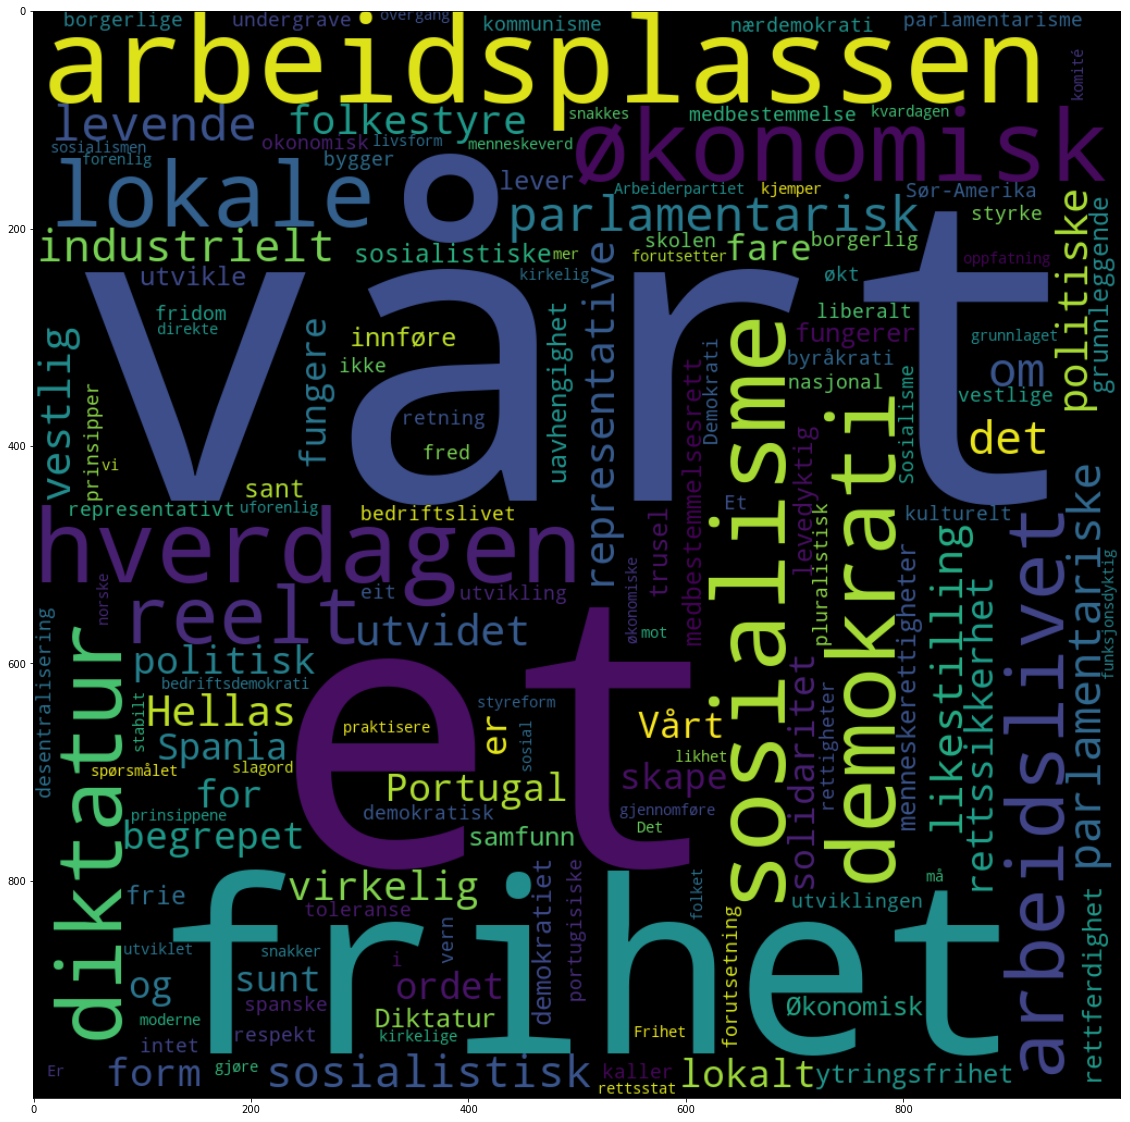

In [20]:
nb.cloud(et_cluster.cluster_set(exponent=1.1,aslist=False)[:150], background='black')